# 📊 HR Analytics: A Data-Driven Exploration of Employee Attrition
*Why do employees quit their jobs?*

## 1. Introduction: Context and Dataset Overview

### 1.1 Context
Employee attrition is a critical issue for organizations due to its significant financial and operational impacts. High attrition can cost companies anywhere from 20% to 200% of an employee's annual salary, factoring in recruitment, training, and lost productivity during the transition. Frequent attrition can also disrupt team dynamics, lower morale, and result in the loss of valuable knowledge and experience.

Understanding the factors that contribute to attrition allows companies to take proactive steps toward improving retention, reducing both direct and indirect costs. Addressing these factors leads to a more stable and engaged workforce, ultimately boosting productivity and business success.

### 1.2 Dataset Overview and Key Variables

- **Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Purpose**: Developed by IBM, this dataset provides detailed information on employee attributes and attrition. It includes factors such as job satisfaction, performance ratings, education level, work-life balance, monthly income, tenure, and more. These elements help identify key factors influencing an employee’s decision to leave.


**Key Variables**:
- **Attrition**: Whether the employee left the company (Yes/No).
- **JobSatisfaction**: The employee's job satisfaction level (Low, Medium, High, Very High).
- **PerformanceRating**: The employee's performance rating (Low, Good, Excellent, Outstanding).
- **MonthlyIncome**: The employee's monthly salary.
- **WorkLifeBalance**: The employee's work-life balance (Bad, Good, Better, Best).
- **YearsAtCompany**: The number of years the employee has worked at the company.
- **DistanceFromHome**: The distance from home to the workplace.
- **JobRole**: The employee's role within the organization.

Other variables present in the dataset may also provide valuable insights and will be explored further during the analysis.

### 1.3 Project Analysis Goals
The main objective of this project is to analyze employee attrition to identify the trends and factors that contribute to employee loss. I will begin with an **exploratory data analysis (EDA)**, using visualizations to identify patterns, correlations, and relationships between key factors. My curiosity will guide the analysis, allowing me to explore new findings and refine my understanding of the data.

Finally, I will create an interactive **Power BI dashboard** to clearly present the findings, making them accessible to stakeholders for informed decision-making.

## 2. Import Libraries and Load Dataset

In [1]:
# Install seaborn library if it's not already installed
!pip3 install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Load the dataset
try:
    df = pd.read_csv('IBM_HR_Analytics_Employee_Attrition.csv')
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print("Error: The file 'IBM_HR_Analytics_Employee_Attrition.csv' was not found.")
    exit()

# Overview
print("Here are the first 5 rows of the dataframe:")
df.head()

Dataset successfully loaded!
Here are the first 5 rows of the dataframe:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Display the number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in our dataframe.")

There are 1470 rows and 35 columns in our dataframe.


## 3. Data Cleaning

### 3.1 Handling Missing Values

In [4]:
# Check for missing values
missing_values = df.isna().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset:")
    print(missing_values[missing_values > 0])

There are no missing values in the dataset.


### 3.2 Remove Duplicates

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.shape[0] == 0:
    print(f"There are no duplicate rows in the dataset. Each row is unique, meaning we have {df.shape[0]} unique employee records in the dataset.")
else:
    print(f"There are {duplicate_rows.shape[0]} duplicate rows in the dataset.")
    print("The following rows are duplicates and we'll remove them:")
    print(duplicate_rows)
    df.drop_duplicates(inplace=True)

There are no duplicate rows in the dataset. Each row is unique, meaning we have 1470 unique employee records in the dataset.


### 3.3 Outliers

In [6]:
# Statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


From the statistics in the table above, there do not appear to be any obvious erroneous values in our dataset. However, we can observe the presence of unnecessary columns, which will be addressed in another section.

As far as outliers are concerned, let's look at the continuous quantitative variables with high variability, such as **DailyRate**, **MonthlyIncome**, **MonthlyRate**, **DistanceFromHome**, **TotalWorkingYears**, and **YearsAtCompany**. Let’s build box plots to identify potential outliers within these variables!

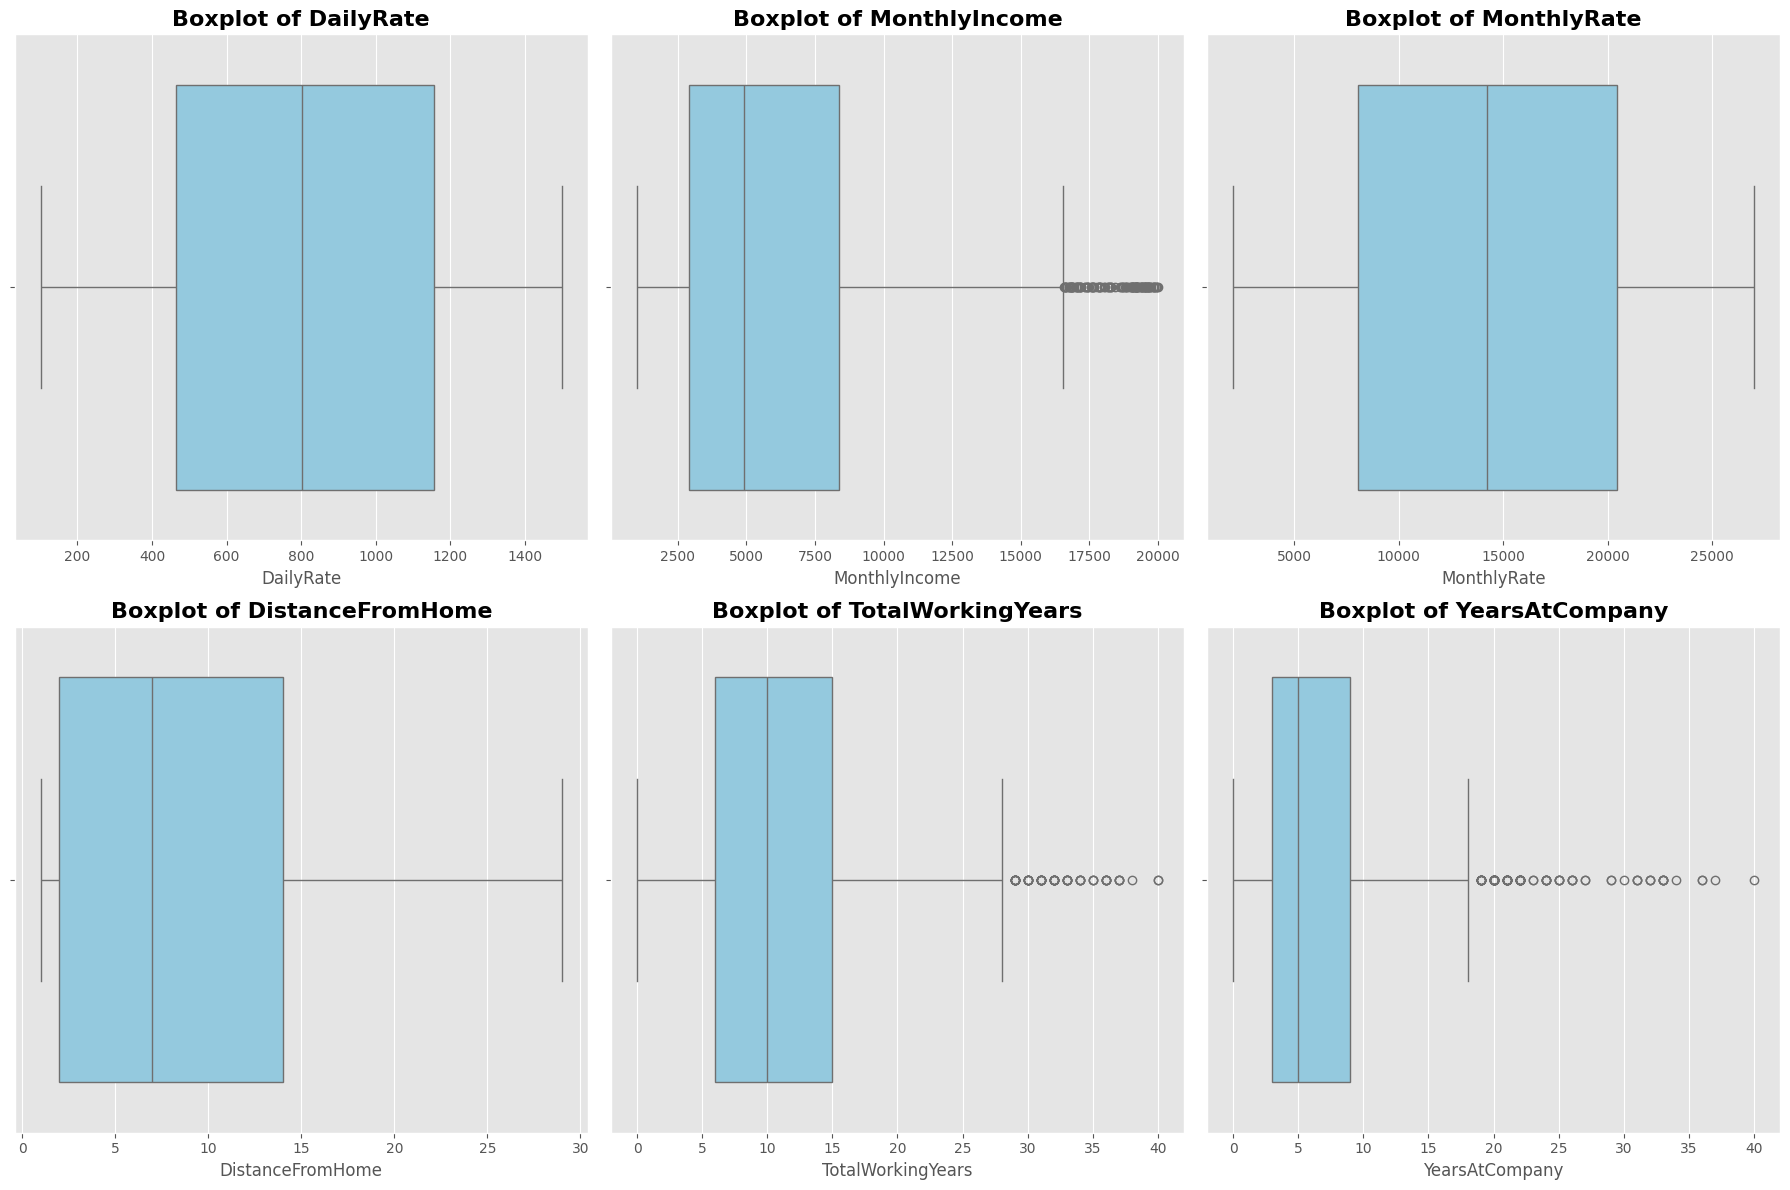

In [7]:
# List of continuous numerical variables to focus on for potential outliers
potential_outliers = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

plt.figure(figsize=(18, 12))

# Create boxplots for each variable
for i, var in enumerate(potential_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=var, color='skyblue')
    plt.title(f'Boxplot of {var}', fontsize=16, weight ='bold')
    plt.xlabel(var, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The variables **DistanceFromHome**, **MonthlyRate**, and **DailyRate** do not exhibit any extreme values. However, **MonthlyIncome**, **TotalWorkingYears** and **YearsAtCompany** have extreme values that exceed the upper whisker of their respective box plots.

Let’s take an informative look at these extreme values!

In [8]:
# Define the variables and their respective thresholds for outliers (upper whisker)
outlier_thresholds = {
    'MonthlyIncome': df['MonthlyIncome'].quantile(0.75) + 1.5 * (df['MonthlyIncome'].quantile(0.75) - df['MonthlyIncome'].quantile(0.25)),
    'TotalWorkingYears': df['TotalWorkingYears'].quantile(0.75) + 1.5 * (df['TotalWorkingYears'].quantile(0.75) - df['TotalWorkingYears'].quantile(0.25)),
    'YearsAtCompany': df['YearsAtCompany'].quantile(0.75) + 1.5 * (df['YearsAtCompany'].quantile(0.75) - df['YearsAtCompany'].quantile(0.25))
}

# Filter the data to get the rows where these variables exceed the threshold
outliers = df[
    (df['MonthlyIncome'] > outlier_thresholds['MonthlyIncome']) | 
    (df['TotalWorkingYears'] > outlier_thresholds['TotalWorkingYears']) | 
    (df['YearsAtCompany'] > outlier_thresholds['YearsAtCompany'])
]

# Display the outliers count and percentage
print(f'There are {outliers.shape[0]} employees with at least one extreme value for one of the variables concerned. This represents { (outliers.shape[0] / df.shape[0]) * 100:.2f}% of the company\'s employees.')

# Display the outliers table
print("\nOutliers found:")
display(outliers)

There are 185 employees with at least one extreme value for one of the variables concerned. This represents 12.59% of the company's employees.

Outliers found:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,...,4,80,1,24,4,3,22,6,5,17
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,42,No,Non-Travel,335,Research & Development,23,2,Life Sciences,1,1976,...,4,80,0,20,2,3,20,9,3,7
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,...,1,80,0,24,2,2,22,6,4,14
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10


For the following steps, I've decided to keep the extreme values:

- Removing them would lead to a significant loss of information.

- The aim is to carry out an EDA and not to concentrate on analyses where extreme values have a negative impact, as in predictive modelling. However, we will remain cautious when performing statistical tests or if we decide to create a correlation matrix.

## 4. Data Wrangling

### 4.1 Data Types 

In [9]:
# Check the data types of each variables
print('The current data types are:')
print(df.dtypes)

The current data types are:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel           

The data types are appropriate for each column, so no changes have been made. However, be careful not to mix all numeric variables. Indeed, there are ordinal variables such as **Education** or **JobInvolvement**, as well as quantitative variables such as **Age** or **MonthlyIncome**.

For data visualization, I'll replace the numeric values of ordinal variables with their corresponding text labels to improve chart clarity and accessibility.

### 4.2 Irelevant Columns 

In [10]:
pd.set_option('display.max_columns', None)
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


We observe that four columns do not provide valuable information for our analysis:

- **Over18**: All employees are over 18, and this column contains the same value ('Y') for every row.
- **StandardHours**: This column has a constant value of 80 for all employees.
- **EmployeeCount**: This column also has a constant value of 1 for all employees.
- **EmployeeNumber**: This is a unique identifier for each employee. While useful for data management, it does not contribute to the analysis itself.

Since these columns do not add value to our analysis, we have decided to remove them from the dataset.

In [11]:
# Remove columns that do not contribute valuable information for analysis
cols_to_drop = ['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
df.drop(columns=cols_to_drop, inplace=True)

### 4.3 Feature Engineering

I want to create a categorical variable called AgeGroup, which represents different age groups.

In [12]:
# Define the age group bins
bins = [17, 24, 31, 38, 45, 52, 60]
labels = ['18-24', '25-31', '32-38', '39-45', '46-52','53-60']

# Create the new 'AgeGroup' variable
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Preview
print(df[['Age', 'AgeGroup']].head())

   Age AgeGroup
0   41    39-45
1   49    46-52
2   37    32-38
3   33    32-38
4   27    25-31


## 5. Exploratory Data Analysis (EDA)

### 5.1 Descriptive Statistics

This section presents a statistical summary of the numerical variables and their basic measures. For categorical and ordinal variables, we will look at their frequency distributions. Ordinal variables are excluded from the statistical summary, as they represent ordered categories with unequal intervals, making statistics such as the mean and standard deviation less relevant.

#### 5.1.1 Summary Statistics for Numerical Variables

In [13]:
# List of ordinal variables
ord_col = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
    'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 
    'JobLevel', 'StockOptionLevel'
]

# Selecting only numerical columns and excluding ordinal variables
df_numerical = df.select_dtypes(include='int64').drop(columns=ord_col)
df_numerical.describe() 

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


#### 5.1.2 Frequency Counts for Categorical Variables

In [14]:
# Value Counts for Categorical Variables
cat_var = df.select_dtypes(include = 'object').columns
for cat in cat_var:
    print(f'Value counts for {cat}:\n{df[cat].value_counts()}\n')

Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             

 #### 5.1.3 Frequency Counts for Ordinal Variables

In [15]:
# Value Counts for Ordinal Variables
for ord in ord_col:
    print(f'Value counts for {ord}:\n{df[ord].value_counts()}\n')

Value counts for Education:
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

Value counts for EnvironmentSatisfaction:
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

Value counts for JobInvolvement:
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

Value counts for JobSatisfaction:
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

Value counts for PerformanceRating:
PerformanceRating
3    1244
4     226
Name: count, dtype: int64

Value counts for RelationshipSatisfaction:
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

Value counts for WorkLifeBalance:
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

Value counts for JobLevel:
JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

Value counts for StockOptionLevel:
StockOptionLevel
0    631
1    596
2    158
3    

### 5.2 Data Visualization

#### 5.2.1 Data Distribution

The objective of this preliminary section is to better understand the distribution of certain variables that I consider important for our analysis of employee attrition. We will explore some quantitative, categorical and ordinal variables to better understand the data I am working with.

More targeted visualisations in relation to our problem of employee attrition will be carried out in the next sections.

#### 5.2.1.1 Quantitative Variables

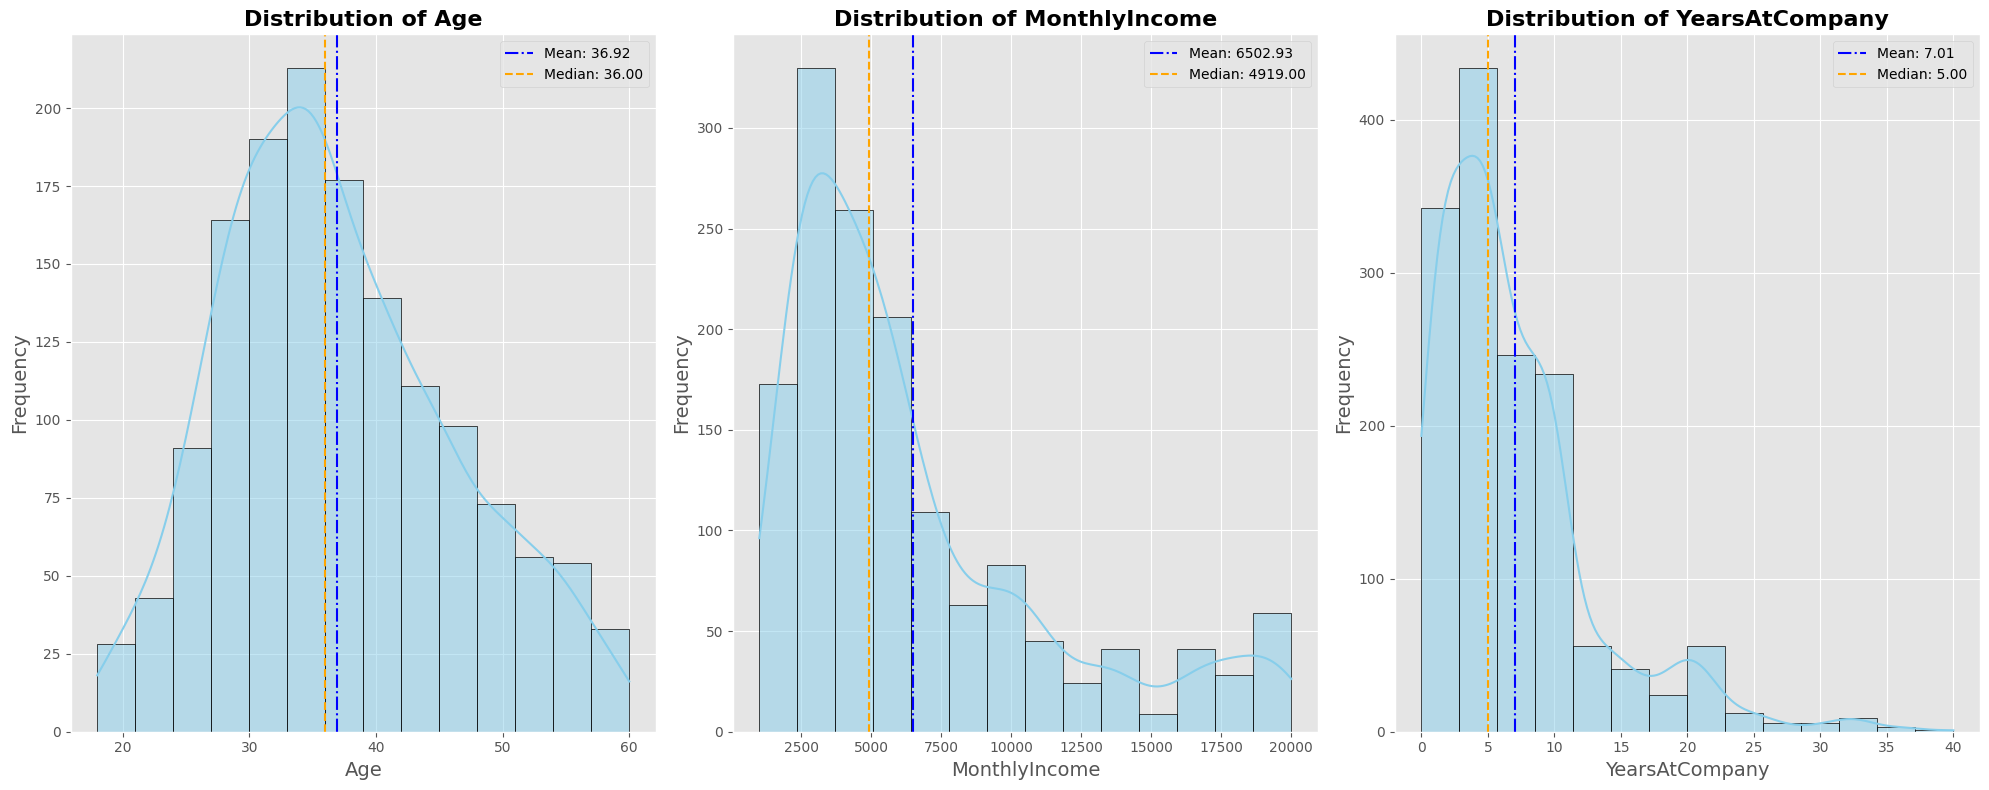

In [16]:
## List of quantitative variables that seem most relevant and whose distribution I want to understand
continuous_vars = ['Age', 'MonthlyIncome', 'YearsAtCompany']

# Visualising the distributions
plt.figure(figsize=(20, 8))
for i, var in enumerate(continuous_vars):
    plt.subplot(1, 3, i+1) 
    sns.histplot(data=df, x=var, kde=True, color='skyblue', bins=14, edgecolor='black')
    
    # Calculate mean and median for each variable
    mean_val = df[var].mean()
    median_val = df[var].median()
    
    # Plot mean and median lines
    plt.axvline(mean_val, color='blue', linestyle='-.', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='orange', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
    
    # Labels
    plt.title(f'Distribution of {var}', fontsize=16, weight='bold')
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Add legend
    plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

- **Age**: Slightly positively skewed normal distribution with a median of 36.
- **MonthlyIncome**: Positively skewed normal distribution, with a median of 4919.
- **YearsAtCompany**: Positively skewed normal distribution, with a median of 5.

#### 5.2.1.3 Categorical Variables

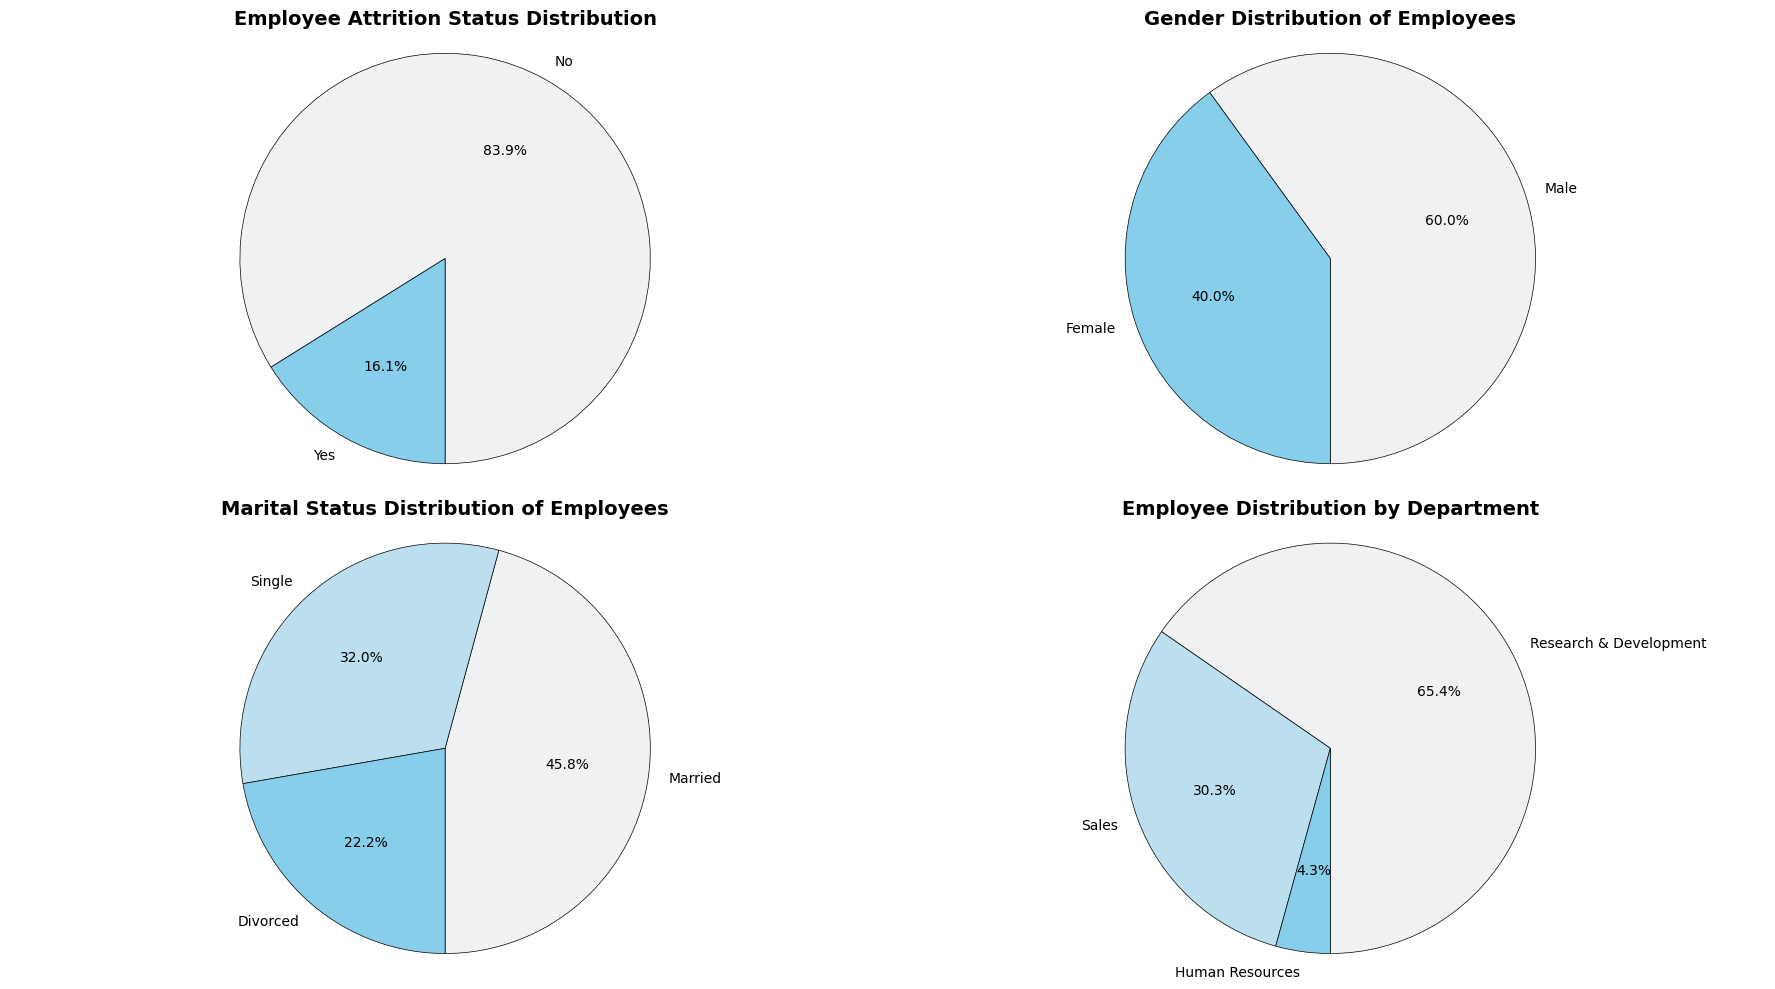

In [76]:
# List of categorical variables whose distribution I want to have an outlook
categorical_vars = ['Attrition', 'Gender', 'MaritalStatus', 'Department']

plt.figure(figsize=(18, 10))

# Create a pie chart for each categorical variable
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i+1)  
    var_counts = df[var].value_counts()
    plt.pie(var_counts, 
            labels=var_counts.index,
            autopct='%1.1f%%',  
            startangle=270,
            colors=sns.light_palette("skyblue", n_colors=len(var_counts)),
            wedgeprops={'edgecolor': 'black'}
    )  
    
    # Set title
    if var == 'Attrition':
        plt.title('Employee Attrition Status Distribution', weight='bold', fontsize=14)
    elif var == 'Gender':
        plt.title('Gender Distribution of Employees', weight='bold', fontsize=14)
    elif var == 'MaritalStatus':
        plt.title('Marital Status Distribution of Employees', weight='bold', fontsize=14)
    elif var == 'Department':
        plt.title('Employee Distribution by Department', weight='bold', fontsize=14)
    
    plt.axis('equal')  

# Show the plot
plt.tight_layout()
plt.show()

#### 5.2.1.4 Distribution of Ordinal Variables

In [18]:
# Define mapping for ordinal variables
ordinal_mappings = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
}

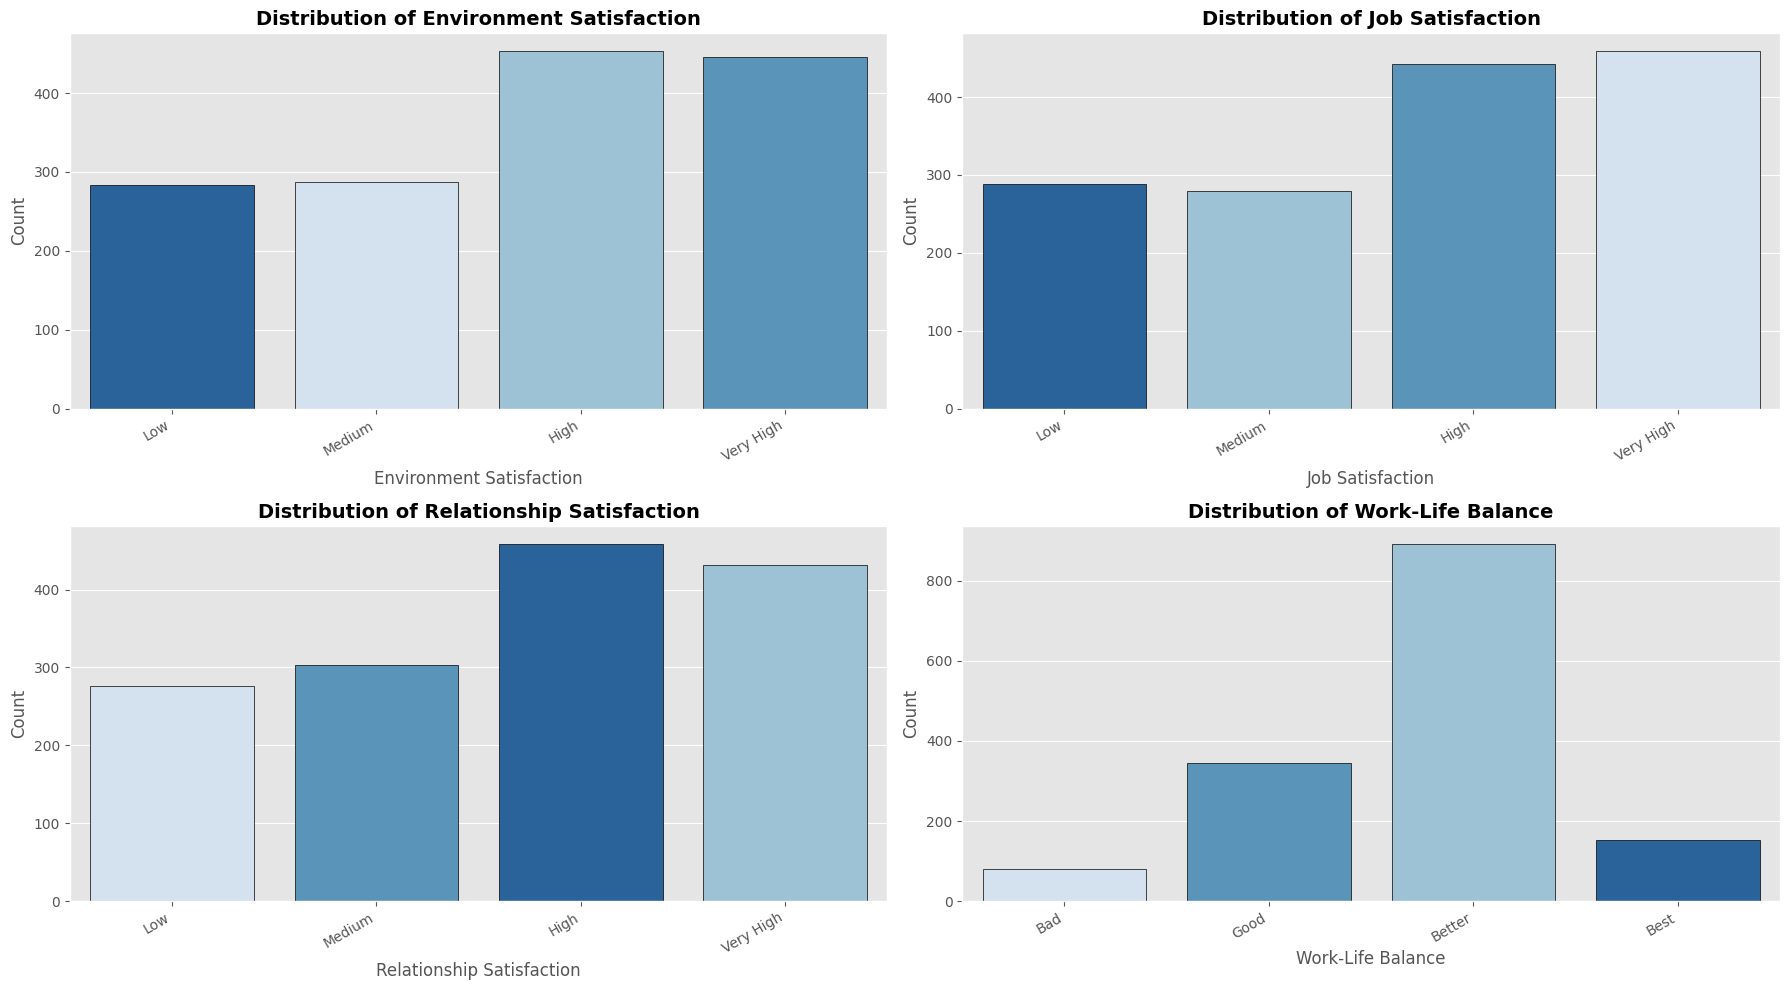

In [77]:
# List of ordinal variables whose distribution I want to visualize
ordinal_vars = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Map numerical values to textual labels for the variables to be plotted
df_mapped = df.copy()
for var in ordinal_vars:
    if var in ordinal_mappings.keys():
        df_mapped[var] = df_mapped[var].replace(ordinal_mappings[var])

# Define the correct order for each variable
order_dict = {
    'EnvironmentSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'JobSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'RelationshipSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'WorkLifeBalance': ['Bad', 'Good', 'Better', 'Best']
}

# Create a figure with a specific size
plt.figure(figsize=(18, 10))

# Create a count plot for each ordinal variable
for i, var in enumerate(ordinal_vars):
    plt.subplot(2, 2, i + 1)
    sns.countplot(
        data=df_mapped, 
        x=var, hue=var, 
        palette="Blues",
        edgecolor='black',
        order=order_dict[var], 
        legend=False
    )
    plt.title(
        f'Distribution of {var.replace("Satisfaction", " Satisfaction").replace("WorkLife", "Work-Life ")}',
        weight='bold', 
        fontsize=14
    )
    plt.xlabel(var.replace("Satisfaction", " Satisfaction").replace("WorkLife", "Work-Life "), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10, rotation=30, ha='right')  
    plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

#### 5.2.2 Impact of Demographic Characteristics on Employee Attrition

##### 5.2.2.1 Age and Attrition
*Does age influence employee attrition rates? Are certain age groups more likely to leave the company?*

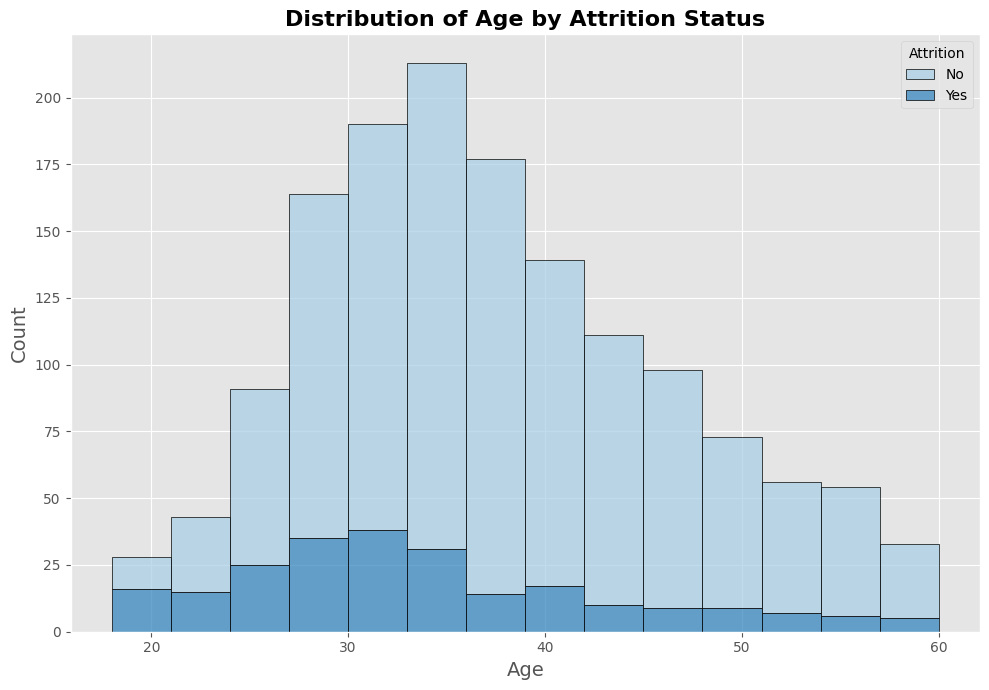

In [51]:
plt.figure(figsize=(10, 7))

# Plot the histogram
sns.histplot(
    data=df, 
    x='Age', 
    hue='Attrition', 
    hue_order=['No','Yes'],
    bins=14, 
    multiple='stack', 
    edgecolor='black', 
    palette='Blues'
)

# Set the title and axis labels
plt.title('Distribution of Age by Attrition Status', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()

# Show the plot
plt.show()

- The majority of the company's employees are in the middle age bracket (around 30-40).
- The attrition rate (dark bars) appears to be higher for younger age groups (around 18-30).

Let's look at the attrition rate by age category !

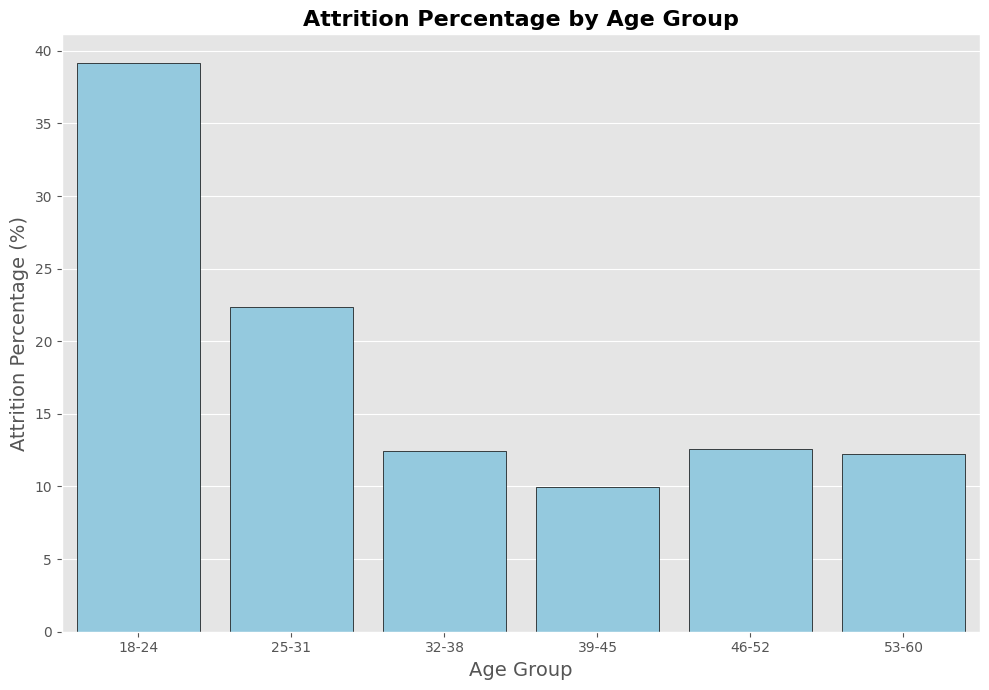

In [74]:
# Calculate the percentage of attrition for each age group
age_attrition_percentage = (
    df.groupby('AgeGroup', observed=False)['Attrition']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Select only the percentage of employees who left ('Yes')
age_attrition_percentage = age_attrition_percentage['Yes']

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(
    x=age_attrition_percentage.index, 
    y=age_attrition_percentage.values,
    color='skyblue',
    edgecolor='black'
)

# Add titles and labels
plt.title('Attrition Percentage by Age Group', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Attrition Percentage (%)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


- The 18-24 age group has the highest attrition rate, at around 40%.
- The percentage falls in the 25-31 age bracket, but remains significantly high (around 20-25%).
- The older age groups (over 30) show much lower and relatively stable attrition rates (around 10-15%).

##### 5.2.2.2 Gender and Attrition

*Is there a difference in attrition rates between men and women?*

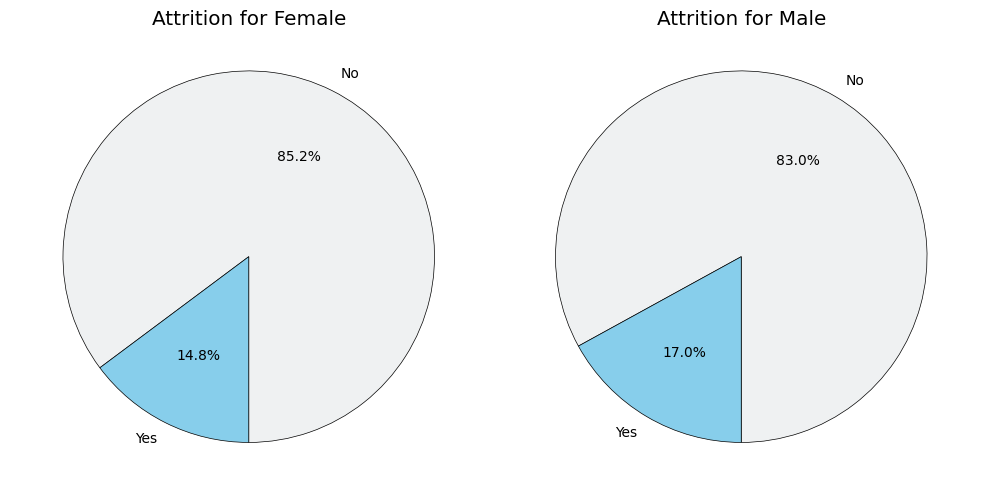

In [78]:
plt.figure(figsize=(10, 5))

unique_genders = df['Gender'].unique()

# Create a pie chart for each gender
for i, var in enumerate(unique_genders):
    plt.subplot(1, 2, i+1) 
    var_counts = df['Attrition'][df['Gender'] == var].value_counts()
    
    # Create the pie chart
    plt.pie(var_counts, 
            labels=var_counts.index,
            autopct='%1.1f%%',  
            startangle=270,
            colors=sns.light_palette("skyblue", n_colors=2),
            wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Attrition for {var}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the plot
plt.tight_layout()
plt.show()


- The attrition rate for women is 17% and 14.8% for men. The small difference suggests that gender does not have a significant impact on the decision to leave the company.

##### 5.2.2.3 Marital Status and Attrition

*Does marital status play a role? Do married employees have a different attrition rate to single or divorced employees?*

##### 5.2.2.4 Conclusion of the section 

- **Younger employees leave more often**: Employees in the 18-24 and 25-31 age groups seem more likely to leave the company. This could reflect instability in their careers or dissatisfaction that is more common among younger professionals.
- **Older employees are more stable**: Older age groups show greater stability, which may be explained by factors such as job security or family responsibilities.




#### 5.2.3 Relationship between Remuneration and Attrition

##### 5.2.3.1 Monthly Income and Attrition
*Is monthly income a key factor influencing attrition? Do higher-paid employees leave the company less often?*

##### 5.2.3.2 Salary Increases and Attrition

À vérifier

##### Correlation Matrix

**For later**

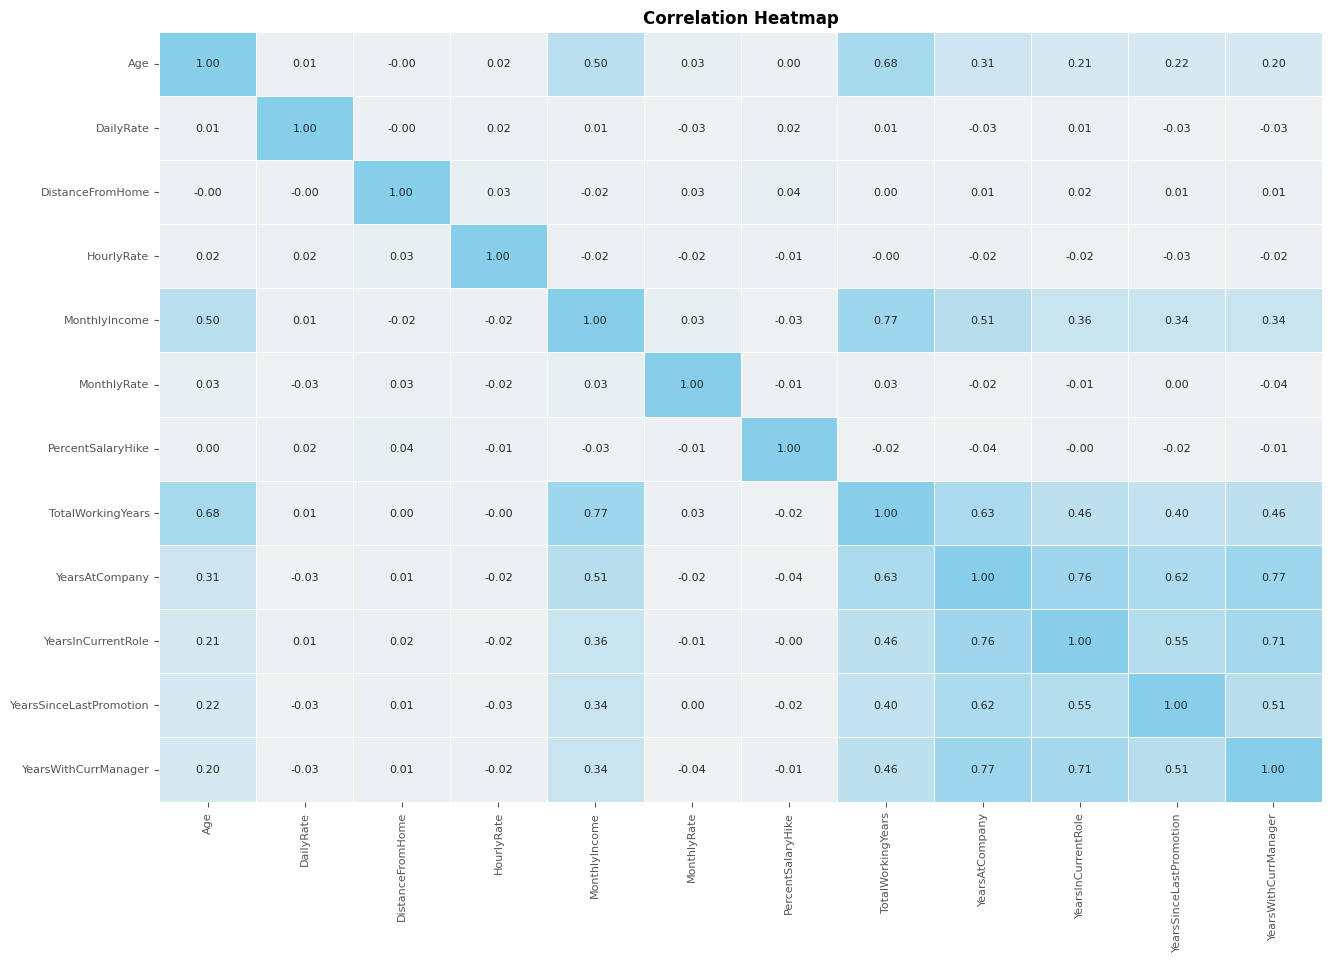

In [24]:
# List of ordinal variables to exclude
ord_col = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
           'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 
           'JobLevel', 'StockOptionLevel']

# Select numerical columns, excluding ordinal variables
df_num = df.select_dtypes(include='number').drop(columns=ord_col)

# Remove discrete variables
df_num.drop(columns=['NumCompaniesWorked', 'TrainingTimesLastYear'], inplace=True)

plt.figure(figsize= (15,10))

# Create a heatmap to show the correlation matrix of the numerical variables
sns.heatmap(df_num.corr() , 
            annot= True,
            cbar= False,
            cmap= sns.light_palette("skyblue", as_cmap=True),
            fmt= '.2f',
            linecolor= 'white', 
            linewidths= 0.5,
            annot_kws= {"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap', fontsize=12, weight ='bold')

# Display the heatmap
plt.show()

Correlation matrix stand by atm 

Rmq : cela aurai été interessant d'avoir les dates de départ, peut etre pour découvrir qu'il y a des périodes de l'année plus propice aux départs